In [1]:
import numpy as np

# 다음은 고정익이 측정한 고도에 따른 온도 정보 이다.
altitude = np.array(
    [-0.433155, 1.079574, 2.638519, 4.623501, 7.126587,
    10.685129, 13.399242, 14.621283, 16.544296, 18.743357,
    21.829630, 25.542978, 29.714117, 32.813224, 34.205818,
    34.623686, 34.706989, 33.525600]
     )

temperature = np.array(
    [23.561301, 23.510735, 23.493920, 23.484786, 23.419431,
    23.386666, 23.325946, 23.291131, 23.284900, 23.214066,
    23.192182, 23.189660, 23.156077, 23.085148, 23.081649,
    23.083885, 23.051354, 22.984942]
     )


In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    altitude, temperature, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

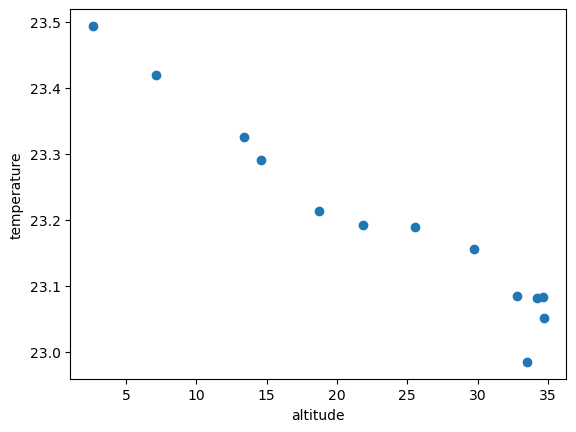

In [3]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

# 선형회귀

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [6]:
print(lr.predict([[50]]))

[22.84995653]


In [7]:
print(lr.coef_, lr.intercept_)

[-0.01304427] 23.50216996357797


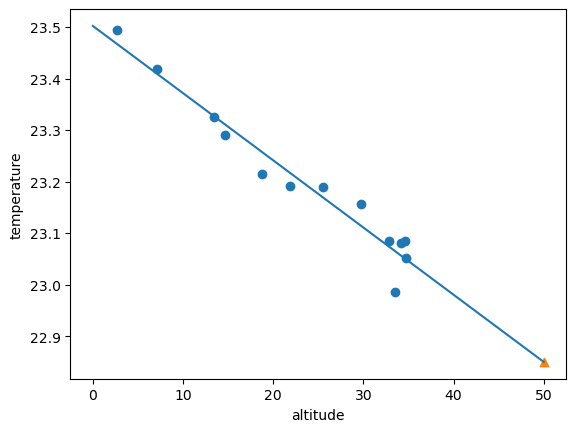

In [8]:
plt.scatter(train_input, train_target)
plt.plot([0, 50], [0*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 22.84995653, marker='^')
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

In [9]:
for n in [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]:
    print(n,"미터에서의 온도는",lr.predict([[n]]))

50 미터에서의 온도는 [22.84995653]
60 미터에서의 온도는 [22.71951384]
70 미터에서의 온도는 [22.58907116]
80 미터에서의 온도는 [22.45862847]
90 미터에서의 온도는 [22.32818579]
100 미터에서의 온도는 [22.1977431]
110 미터에서의 온도는 [22.06730041]
120 미터에서의 온도는 [21.93685773]
130 미터에서의 온도는 [21.80641504]
140 미터에서의 온도는 [21.67597235]
150 미터에서의 온도는 [21.54552967]


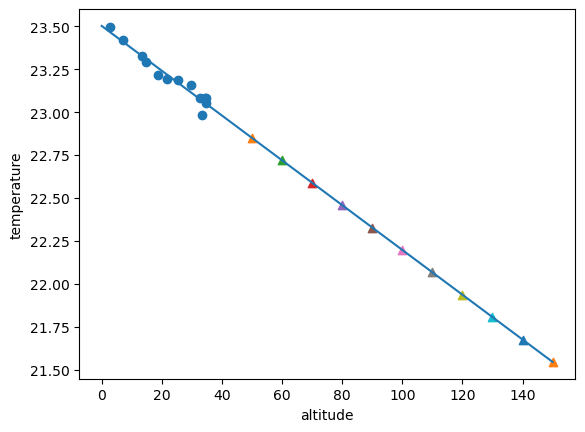

In [10]:
plt.scatter(train_input, train_target)
plt.plot([0, 150], [0*lr.coef_+lr.intercept_, 150*lr.coef_+lr.intercept_])
for n in [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]:
    plt.scatter([n], [lr.predict([[n]])], marker='^')
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

In [11]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
if(lr.score(train_input, train_target)<lr.score(test_input, test_target)) :
    print('\033[31m' + '과소적합' + '\033[0m')

0.9474908392250123
0.8805685309646263


# 다항회귀

In [12]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [13]:
print(train_poly.shape, test_poly.shape)

(13, 2) (5, 2)


In [14]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[60**2, 60]]))

[22.88643627]


In [15]:
print(lr.coef_, lr.intercept_)

[ 0.00011623 -0.0178109 ] 23.536662483189975


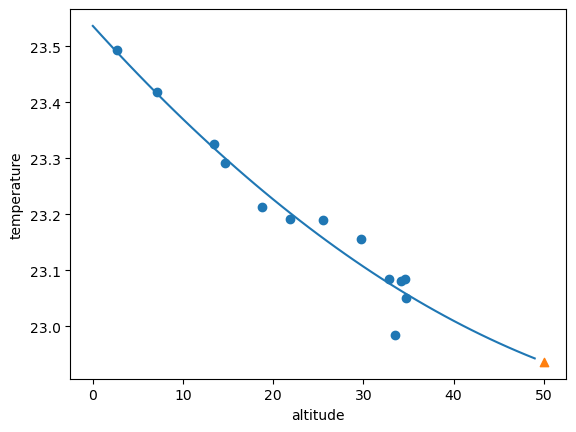

In [16]:
point = np.arange(0, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 0.00011623*point**2 - 0.0178109*point + 23.536662483189975)
plt.scatter([50], [22.9367], marker='^')
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

In [17]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.953192966158092
0.9593465065616957
